# Layer Ricci Coefficients

In this notebook we calculate the layer Ricci Coefficients on various synthetic and real-world datasets and for different network depths. We begin by importing the necessary packages.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import torch
from tqdm.auto import tqdm
import os
import sys
import csv

sys.path.append(os.path.abspath('..'))
from ricci_coefficients import Ricci_Coefficients
from helpers import train_model
from neural_networks import DNN
from datasets import DatasetFactory

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

num_iterations = 50      # Number of iterations used for averaging results

Using mps device


# 1. Syn-I Dataset

In [ ]:
# Load datasets
X_train_circles, y_train_circles = DatasetFactory.make_circles(noise=0.03)
X_test_circles, y_test_circles = DatasetFactory.make_circles(noise=0.03)

# Network depths 
depths = [6,8,10,12,14,16]

layer_ricci_coefficients = []   # Overall results
for depth in depths:
    layer_ricci_coefs_depth = []
    for _ in tqdm(range(num_iterations), desc=f"Depth={depth}"):
            # Train models
            model = DNN(input_dimension=2, hidden_units=25, depth=depth, vision_model=False)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_circles,
                y_train=y_train_circles,
                X_test=X_test_circles,
                y_test=y_test_circles
            )
            # Calculate layer Ricci coefficients
            layer_ricci = Ricci_Coefficients(
                model, X_test_circles, 50
            ).layer_ricci_coefficient(curv='Approx-Ollivier-Ricci')
            layer_ricci_coefs_depth.append(layer_ricci)
    # Take means         
    stacked = np.stack(layer_ricci_coefs_depth, axis=0)
    averaged_results = stacked.mean(axis=0)
    layer_ricci_coefficients.append(averaged_results)

Text(0, 0.5, 'Layer-Ricci coef.')

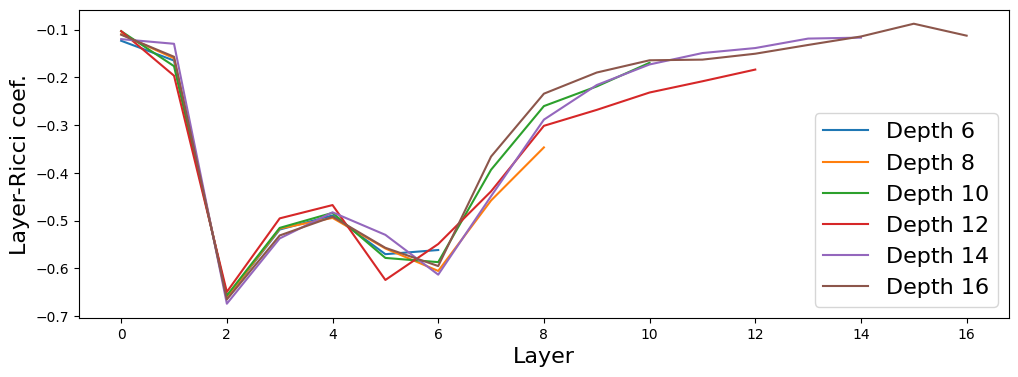

In [ ]:
# Plot results
plt.figure(figsize=(12,4))
for i in range(len(layer_ricci_coefficients)):
    plt.plot(np.arange(len(layer_ricci_coefficients[i])),layer_ricci_coefficients[i], label=f"Depth {6+i*2}")
plt.legend(fontsize=16)
plt.xlabel("Layer", fontsize=16)
plt.ylabel("Layer-Ricci coef.", fontsize=16)

# 2. Syn-II Dataset

In [ ]:
# Load datasets
X_train_4circles, y_train_4circles = DatasetFactory.make_4circles()
X_test_4circles, y_test_4circles = DatasetFactory.make_4circles()

# Network depths 
depths = [6,8,10,12,14,16]

layer_ricci_coefficients = []
for depth in depths:
    layer_ricci_coefs_depth = []
    for _ in tqdm(range(num_iterations), desc=f"Depth={depth}"):
            # Train model
            model = DNN(input_dimension=2, hidden_units=25, depth=depth, vision_model=False)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_4circles,
                y_train=y_train_4circles,
                X_test=X_test_4circles,
                y_test=y_test_4circles
            )
            # Calculate layer Ricci coefficients
            layer_ricci = Ricci_Coefficients(
                model, X_test_4circles, 50
            ).layer_ricci_coefficient(curv='Approx-Ollivier-Ricci')
            layer_ricci_coefs_depth.append(layer_ricci)
    # Take means
    stacked = np.stack(layer_ricci_coefs_depth, axis=0)
    averaged_results = stacked.mean(axis=0)
    layer_ricci_coefficients.append(averaged_results)

Text(0, 0.5, 'Layer-Ricci coef.')

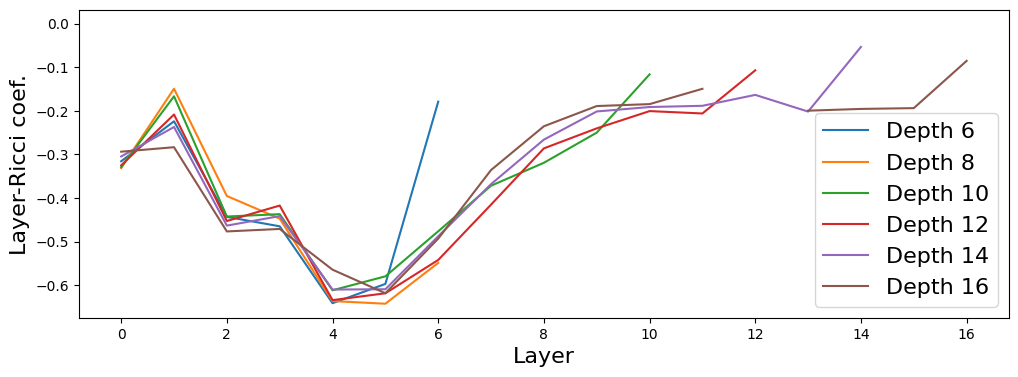

In [ ]:
# Plot results
plt.figure(figsize=(12,4))
for i in range(len(layer_ricci_coefficients)):
    plt.plot(np.arange(len(layer_ricci_coefficients[i])),layer_ricci_coefficients[i], label=f"Depth {6+i*2}")
plt.legend(fontsize=16)
plt.xlabel("Layer", fontsize=16)
plt.ylabel("Layer-Ricci coef.", fontsize=16)

# 3. Syn-III Dataset

In [ ]:
# Load datasets
X_train_cylinder,y_train_cylinder = DatasetFactory.make_cylinders()
X_test_cylinder,y_test_cylinder = DatasetFactory.make_cylinders()

# Network depths
depths = [6,8,10,12,14,16]

layer_ricci_coefficients = []
for depth in depths:
    layer_ricci_coefs_depth = []
    for _ in tqdm(range(num_iterations), desc=f"Depth={depth}"):
            # Train model
            model = DNN(input_dimension=3, hidden_units=25, depth=depth, vision_model=False)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_cylinder,
                y_train=y_train_cylinder,
                X_test=X_test_cylinder,
                y_test=y_test_cylinder
            )
            # Calculate layer Ricci coefficient
            layer_ricci = Ricci_Coefficients(
                model, X_test_cylinder, 50
            ).layer_ricci_coefficient(curv='Approx-Ollivier-Ricci')
            layer_ricci_coefs_depth.append(layer_ricci)
    # Take means
    stacked = np.stack(layer_ricci_coefs_depth, axis=0)
    averaged_results = stacked.mean(axis=0)
    layer_ricci_coefficients.append(averaged_results)

Text(0, 0.5, 'Layer-Ricci coef.')

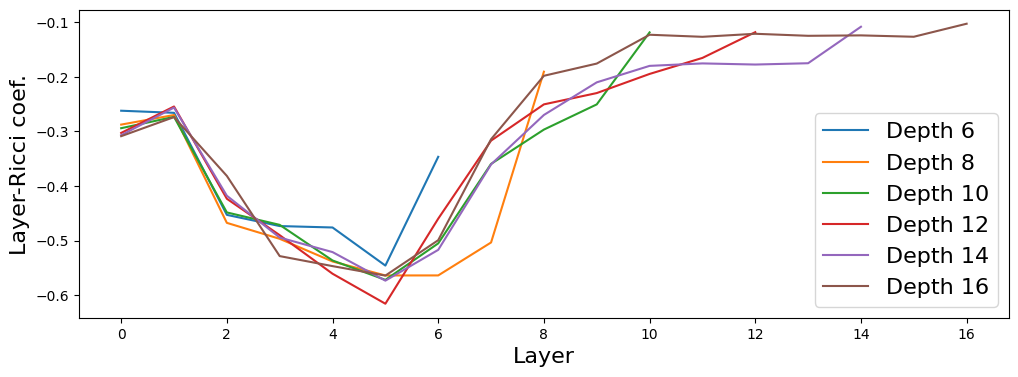

In [ ]:
# Plot results
plt.figure(figsize=(12,4))
for i in range(len(layer_ricci_coefficients)):
    plt.plot(np.arange(len(layer_ricci_coefficients[i])),layer_ricci_coefficients[i], label=f"Depth {6+i*2}")
plt.legend(fontsize=16)
plt.xlabel("Layer", fontsize=16)
plt.ylabel("Layer-Ricci coef.", fontsize=16)

# 4. Syn-IV Dataset

In [ ]:
# Load datasets
X_train_tori, y_train_tori = DatasetFactory.make_tori()
X_test_tori, y_test_tori = DatasetFactory.make_tori()

# Network depths
depths = [6,8,10,12,14,16]

layer_ricci_coefficients = []
for depth in depths:
    layer_ricci_coefs_depth = []
    for _ in tqdm(range(num_iterations), desc=f"Depth={depth}"):
            # Train model
            model = DNN(input_dimension=3, hidden_units=25, depth=depth, vision_model=False)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_tori,
                y_train=y_train_tori,
                X_test=X_test_tori,
                y_test=y_test_tori
            )
            # Calculate layer Ricci coefficient
            layer_ricci = Ricci_Coefficients(
                model, X_test_tori, 50
            ).layer_ricci_coefficient(curv='Approx-Ollivier-Ricci')
            layer_ricci_coefs_depth.append(layer_ricci)
    # Take means
    stacked = np.stack(layer_ricci_coefs_depth, axis=0)
    averaged_results = stacked.mean(axis=0)
    layer_ricci_coefficients.append(averaged_results)

Text(0, 0.5, 'Layer-Ricci coef.')

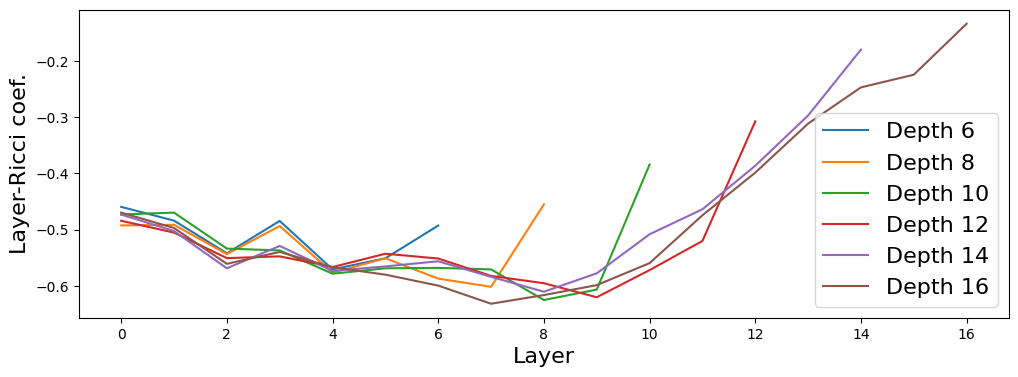

In [ ]:
# Plot results
plt.figure(figsize=(12,4))
for i in range(len(layer_ricci_coefficients)):
    plt.plot(np.arange(len(layer_ricci_coefficients[i])),layer_ricci_coefficients[i], label=f"Depth {6+i*2}")
plt.legend(fontsize=16)
plt.xlabel("Layer", fontsize=16)
plt.ylabel("Layer-Ricci coef.", fontsize=16)

# 5. MNIST Dataset

## 5.1 MNIST 1 vs. 7

In [ ]:
# Load dataset
X_train_MNIST_17,y_train_MNIST_17, X_test_MNIST_17, y_test_MNIST_17 = DatasetFactory.load_MNIST(digits=(1,7))

# Network depths
depths = [6,8,10,12,14,16]

layer_ricci_coefficients = []
for depth in depths:
    layer_ricci_coefs_depth = []
    for _ in tqdm(range(num_iterations), desc=f"Depth={depth}"):
            # Train model
            model = DNN(input_dimension=784, hidden_units=25, depth=depth, vision_model=True)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_MNIST_17,
                y_train=y_train_MNIST_17,
                X_test=X_test_MNIST_17,
                y_test=y_test_MNIST_17
            )
            # Calculate layer Ricci coefficient
            layer_ricci = Ricci_Coefficients(
                model, X_test_MNIST_17, 50
            ).layer_ricci_coefficient(curv='Augmented-Forman-Ricci')
            layer_ricci_coefs_depth.append(layer_ricci)
    # Take means
    stacked = np.stack(layer_ricci_coefs_depth, axis=0)
    averaged_results = stacked.mean(axis=0)
    layer_ricci_coefficients.append(averaged_results)

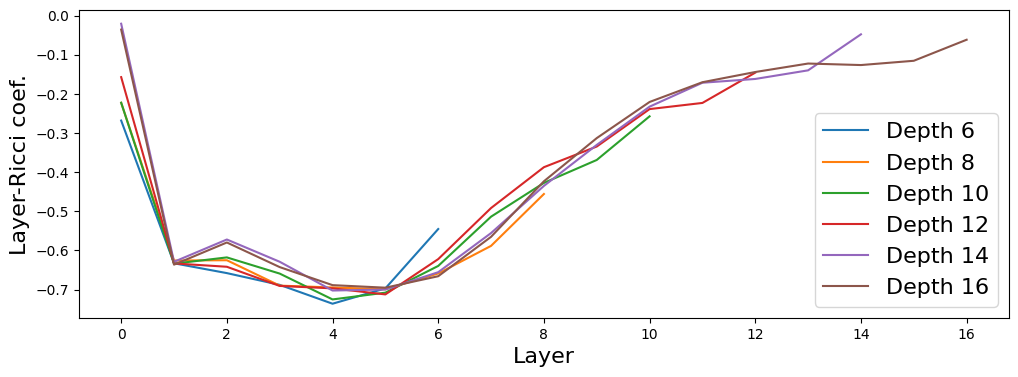

In [ ]:
# Plot results
plt.figure(figsize=(12,4))
for i in range(len(layer_ricci_coefficients)):
    plt.plot(np.arange(len(layer_ricci_coefficients[i])),layer_ricci_coefficients[i], label=f"Depth {6+i*2}")
plt.legend(fontsize=16)
plt.xlabel("Layer", fontsize=16)
plt.ylabel("Layer-Ricci coef.", fontsize=16)
plt.savefig("../plots/Layer_Ricci_Coefficients.png", dpi=300, bbox_inches="tight")

## 5.2 MNIST 6 vs.9 

In [ ]:
# Load datasets
X_train_MNIST_69,y_train_MNIST_69, X_test_MNIST_69, y_test_MNIST_69 = DatasetFactory.load_MNIST(digits=(6,9))

# Network depths
depths = [6,8,10,12,14, 16]

layer_ricci_coefficients = []
for depth in depths:
    layer_ricci_coefs_depth = []
    for _ in tqdm(range(num_iterations), desc=f"Depth={depth}"):
            # Train model
            model = DNN(input_dimension=784, hidden_units=25, depth=depth, vision_model=True)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_MNIST_69,
                y_train=y_train_MNIST_69,
                X_test=X_test_MNIST_69,
                y_test=y_test_MNIST_69
            )
            # Calculate layer Ricci coefficient
            layer_ricci = Ricci_Coefficients(
                model, X_test_MNIST_69, 50
            ).layer_ricci_coefficient(curv='Approx-Ollivier-Ricci')
            layer_ricci_coefs_depth.append(layer_ricci)
    # Take means
    stacked = np.stack(layer_ricci_coefs_depth, axis=0)
    averaged_results = stacked.mean(axis=0)
    layer_ricci_coefficients.append(averaged_results)

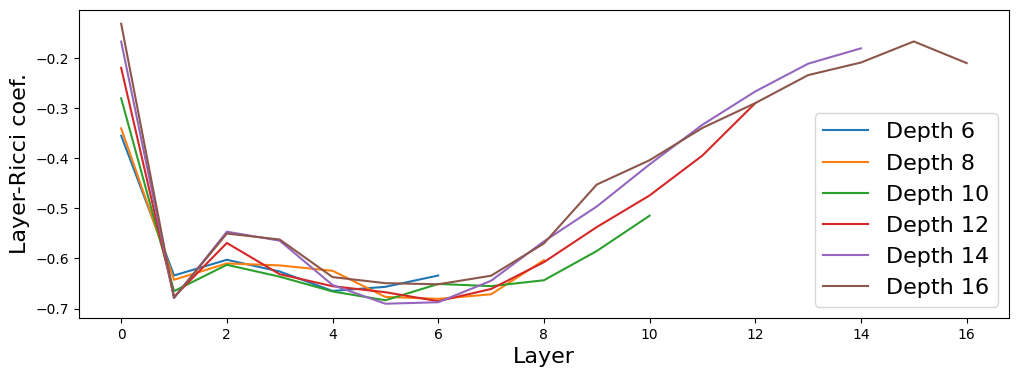

In [ ]:
# Plot results
plt.figure(figsize=(12,4))
for i in range(len(layer_ricci_coefficients)):
    plt.plot(np.arange(len(layer_ricci_coefficients[i])),layer_ricci_coefficients[i], label=f"Depth {6+i*2}")
plt.legend(fontsize=16)
plt.xlabel("Layer", fontsize=16)
plt.ylabel("Layer-Ricci coef.", fontsize=16)

# 6. Fashion-MNIST Dataset

## 6.1 Fashion-MNIST Shoes

In [ ]:
# Load datasets
X_train_fMNIST_shoes,y_train_fMNIST_shoes, X_test_fMNIST_shoes, y_test_fMNIST_shoes = DatasetFactory.load_fMNIST((5,7), device=device)

# Network depths
depths = [10,12,14,16,18]

layer_ricci_coefficients = []
for depth in depths:
    layer_ricci_coefs_depth = []
    for _ in tqdm(range(num_iterations), desc=f"Depth={depth}"):
            # Train models
            model = DNN(input_dimension=784, hidden_units=25, depth=depth, vision_model=True).to(device=device)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_fMNIST_shoes,
                y_train=y_train_fMNIST_shoes,
                X_test=X_test_fMNIST_shoes,
                y_test=y_test_fMNIST_shoes
            )
            # Calculate layer Ricci coefficients
            layer_ricci = Ricci_Coefficients(
                model, X_test_fMNIST_shoes, 50
            ).layer_ricci_coefficient(curv='Approx-Ollivier-Ricci')
            layer_ricci_coefs_depth.append(layer_ricci)
    # Take means
    stacked = np.stack(layer_ricci_coefs_depth, axis=0)
    averaged_results = stacked.mean(axis=0)
    layer_ricci_coefficients.append(averaged_results)

Text(0, 0.5, 'Layer-Ricci coef.')

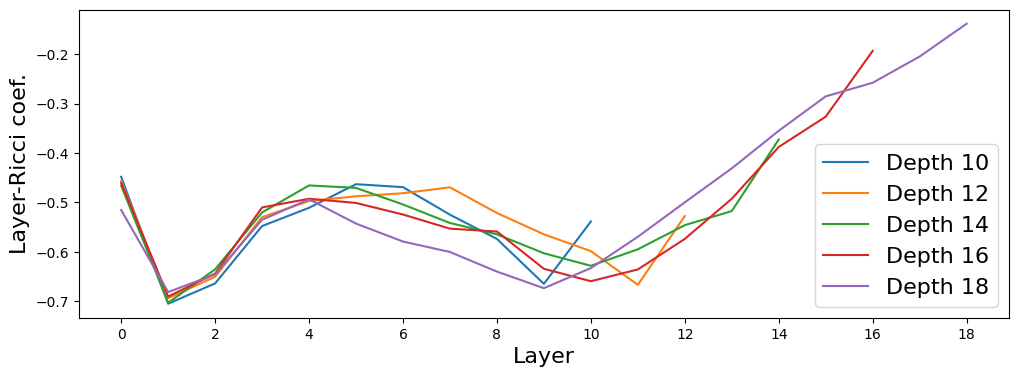

In [6]:
# Plot results
plt.figure(figsize=(12,4))
for i in range(len(layer_ricci_coefficients)):
    plt.plot(np.arange(len(layer_ricci_coefficients[i])),layer_ricci_coefficients[i], label=f"Depth {10+i*2}")
plt.legend(fontsize=16)
plt.xticks(np.arange(10)*2)
plt.xlabel("Layer", fontsize=16)
plt.ylabel("Layer-Ricci coef.", fontsize=16)

## 6.2 Fashion-MNIST Apperal

In [ ]:
# Load dataset
X_train_fMNIST_apperal,y_train_fMNIST_apperal, X_test_fMNIST_apperal, y_test_fMNIST_apperal = DatasetFactory.load_fMNIST((3,6), device=device)

# Network depths
depths = [12,14,16,18,20]

layer_ricci_coefficients = []
for depth in depths:
    layer_ricci_coefs_depth = []
    for _ in tqdm(range(num_iterations), desc=f"Depth={depth}"):
            # Train model
            model = DNN(input_dimension=784, hidden_units=25, depth=depth, vision_model=True).to(device=device)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_fMNIST_apperal,
                y_train=y_train_fMNIST_apperal,
                X_test=X_test_fMNIST_apperal,
                y_test=y_test_fMNIST_apperal
            )
            # Calculate layer Ricci coefficients
            layer_ricci = Ricci_Coefficients(
                model, X_test_fMNIST_apperal, 50
            ).layer_ricci_coefficient(curv='Approx-Ollivier-Ricci')
            layer_ricci_coefs_depth.append(layer_ricci)
    # Take means
    stacked = np.stack(layer_ricci_coefs_depth, axis=0)
    averaged_results = stacked.mean(axis=0)
    layer_ricci_coefficients.append(averaged_results)

Text(0, 0.5, 'Layer-Ricci coef.')

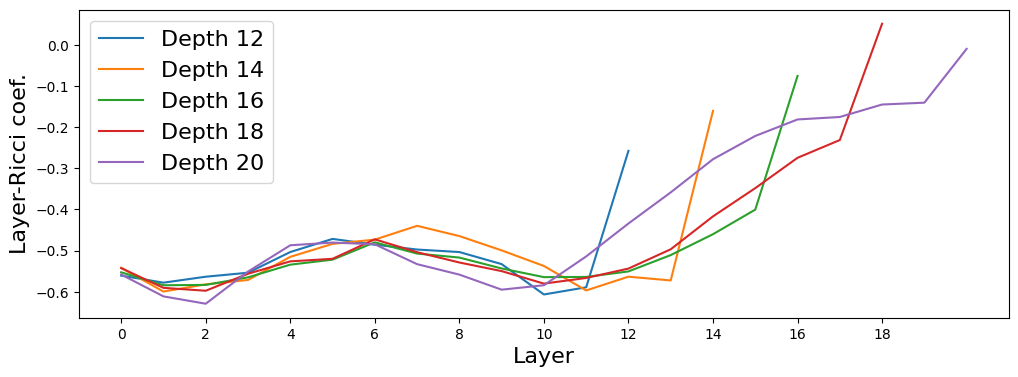

In [11]:
# Plot results
plt.figure(figsize=(12,4))
for i in range(len(layer_ricci_coefficients)):
    plt.plot(np.arange(len(layer_ricci_coefficients[i])),layer_ricci_coefficients[i], label=f"Depth {12+i*2}")
plt.legend(fontsize=16)
plt.xticks(np.arange(10)*2)
plt.xlabel("Layer", fontsize=16)
plt.ylabel("Layer-Ricci coef.", fontsize=16)

# 7. CIFAR Dataset

In [ ]:
X_train_CIFAR, y_train_CIFAR, X_test_CIFAR, y_test_CIFAR = DatasetFactory.load_CIFAR((0,1), device=device)

depths = [12,14,16,18,20]

layer_ricci_coefficients_CIFAR = []
for depth in depths:
    layer_ricci_coefs_depth = []
    for _ in tqdm(range(num_iterations), desc=f"Depth={depth}"):
            model = DNN(input_dimension=3*32*32, hidden_units=25, depth=depth, vision_model=True).to(device=device)
            train_model(
                threshold_accuracy=99,
                model=model,
                X_train=X_train_CIFAR,
                y_train=y_train_CIFAR,
                X_test=X_test_CIFAR,
                y_test=y_test_CIFAR
            )
            layer_ricci = Ricci_Coefficients(
                model, X_test_CIFAR, 50
            ).layer_ricci_coefficient(curv='Approx-Ollivier-Ricci')
            layer_ricci_coefs_depth.append(layer_ricci)
    stacked = np.stack(layer_ricci_coefs_depth, axis=0)
    averaged_results = stacked.mean(axis=0)
    layer_ricci_coefficients_CIFAR.append(averaged_results)

Text(0, 0.5, 'Layer-Ricci coef.')

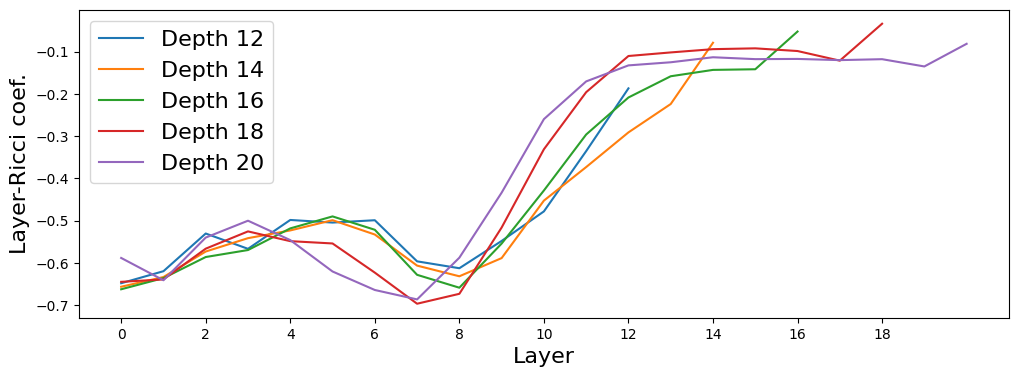

In [19]:
# Plot results
plt.figure(figsize=(12,4))
for i in range(len(layer_ricci_coefficients_CIFAR)):
    plt.plot(np.arange(len(layer_ricci_coefficients_CIFAR[i])),layer_ricci_coefficients_CIFAR[i], label=f"Depth {12+i*2}")
plt.legend(fontsize=16)
plt.xticks(np.arange(10)*2)
plt.xlabel("Layer", fontsize=16)
plt.ylabel("Layer-Ricci coef.", fontsize=16)